In [ ]:

import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [ ]:
from random import sample
n_classes = 25
categories = sample(list(open('categories.txt', 'r').readlines()), n_classes)
categories = [x.strip('\n') for x in categories]
print(categories)

# print(list(open('categories.txt', 'r').readlines()))

['paint can', 'eye', 'The Mona Lisa', 'spoon', 'picture frame', 'rain', 'bandage', 'blackberry', 'computer', 'peanut', 'helmet', 'flamingo', 'power outlet', 'hockey puck', 'beach', 'square', 'bracelet', 'horse', 'basketball', 'rollerskates', 'flying saucer', 'rainbow', 'bread', 'cannon', 'raccoon']


In [ ]:
import pickle
with open(f'classes_{n_classes}.pkl', 'wb') as f:
  pickle.dump(categories, f)

In [ ]:
categories = pickle.load(open(f'classes_{n_classes}.pkl', 'rb'))

In [ ]:
categories

['paint can',
 'eye',
 'The Mona Lisa',
 'spoon',
 'picture frame',
 'rain',
 'bandage',
 'blackberry',
 'computer',
 'peanut',
 'helmet',
 'flamingo',
 'power outlet',
 'hockey puck',
 'beach',
 'square',
 'bracelet',
 'horse',
 'basketball',
 'rollerskates',
 'flying saucer',
 'rainbow',
 'bread',
 'cannon',
 'raccoon']

In [ ]:
import urllib.request
def download():
  
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in categories:
    cls_url = c.replace('_', '%20')
    cls_url = c.replace(' ', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [ ]:
!rm -r data
!mkdir data

In [ ]:
download() 

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/paint%20can.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eye.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/The%20Mona%20Lisa.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/spoon.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/picture%20frame.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/rain.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bandage.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/blackberry.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/computer.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/peanut.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/helmet.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/flamingo.npy
https://storage.googleapis.com/quick

In [ ]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 5000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names
     

In [ ]:

x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

In [ ]:
print(len(x_train), num_classes)

100000 25


cannon


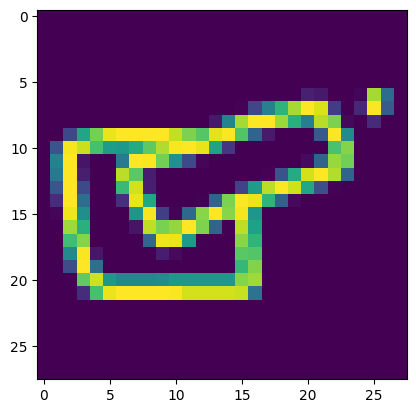

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [ ]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(n_classes, activation='softmax')) 
# Train model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 64)        

In [ ]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)

Epoch 1/5
352/352 - 4s - loss: 1.3791 - top_k_categorical_accuracy: 0.8613 - val_loss: 0.9400 - val_top_k_categorical_accuracy: 0.9250 - 4s/epoch - 13ms/step
Epoch 2/5
352/352 - 2s - loss: 0.8349 - top_k_categorical_accuracy: 0.9345 - val_loss: 0.7767 - val_top_k_categorical_accuracy: 0.9403 - 2s/epoch - 5ms/step
Epoch 3/5
352/352 - 2s - loss: 0.7149 - top_k_categorical_accuracy: 0.9460 - val_loss: 0.7101 - val_top_k_categorical_accuracy: 0.9462 - 2s/epoch - 5ms/step
Epoch 4/5
352/352 - 2s - loss: 0.6479 - top_k_categorical_accuracy: 0.9522 - val_loss: 0.6653 - val_top_k_categorical_accuracy: 0.9512 - 2s/epoch - 6ms/step
Epoch 5/5
352/352 - 2s - loss: 0.6008 - top_k_categorical_accuracy: 0.9564 - val_loss: 0.6349 - val_top_k_categorical_accuracy: 0.9540 - 2s/epoch - 6ms/step


In [ ]:
score = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

782/782 - 2s - loss: 0.6395 - top_k_categorical_accuracy: 0.9520 - 2s/epoch - 2ms/step
Test accuracy: 95.20%


1/1 [==============================] - 0s 22ms/step
spoon
['spoon', 'flamingo', 'paint can', 'peanut', 'cannon']


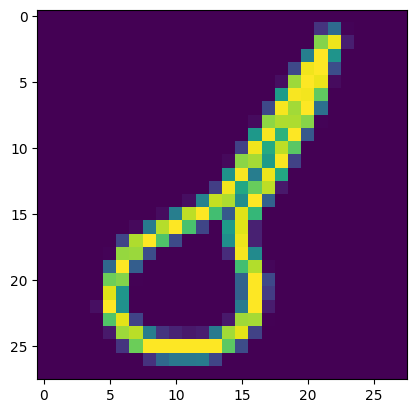

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(class_names[np.argmax(y_test[idx])])
print(latex)

In [ ]:
np.expand_dims(img, axis=0).shape

(1, 28, 28, 1)

In [ ]:
model.save(f'quickdraw_{n_classes}_classes.h5')

In [ ]:
categories